In [1]:
import numpy as np
import pandas as pd
#import mifs
import sklearn.feature_selection
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.feature_selection import SelectPercentile, f_classif
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import logging
Log = logging.getLogger()
level = logging.getLevelName('INFO')
Log.setLevel(level)

/Users/debasis/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
import os
os.getcwd()

'/Users/debasissen/Google Drive/Machine learning/sellics-test'

In [5]:
d_train=pd.read_csv('/Users/debasissen/Google Drive/Machine learning/sellics-test/technical_train_test_data/train.csv')

In [6]:
d_test=pd.read_csv('/Users/debasissen/Google Drive/Machine learning/sellics-test/technical_train_test_data/test.csv')

In [8]:
d_train.sort_values('entity_id').head()

,entity_id,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,att41,att42,att43,att44,att45,att46,att47,att48,att49,att50,att51,att52,att53,att54,att55,att56,att57,att58,att59,att60,att61,att62,att63,att64,att65,att66,att67,att68,att69,att70,att71,att72,att73,att74,att75,att76,att77,att78,att79,att80,att81,att82,att83,att84,att85,att86,att87,att88,att89,att90,att91,att92,att93,att94,att95,att96,att97,att98,att99,att100,att101,att102,att103,att104,att105,att106,att107,att108,att109,att110,att111,att112,att113,att114,att115,att116,att117,att118,att119,att120,att121,att122,att123,att124,att125,att126,att127,att128,att129,att130,att131,att132,att133,att134,att135,att136,att137,att138,att139,att140,att141,att142,att143,att144,att145,att146,att147,att148,att149,att150,att151,att152,att153,att154,att155,att156,att157,att158,att159,att160,device,week,Clicks,Conversions
8696,4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Computer,31,1,0
10274,5,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Computer,30,1,0
8137,6,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Computer,31,1,0
4601,8,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Computer,30,1,0
15083,10,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Computer,31,1,0


In [14]:
print("Shape of train data:",d_train.shape)
print("Shape of train data:",d_test.shape)

print("Train data columsn:", d_train.columns)

Shape of train data: (44945, 165)
Shape of train data: (11236, 162)
Train data columsn: Index(['entity_id', 'att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7',
       'att8', 'att9',
       ...
       'att155', 'att156', 'att157', 'att158', 'att159', 'att160', 'device',
       'week', 'Clicks', 'Conversions'],
      dtype='object', length=165)


# Target Variable

In [27]:
y = d_train.Conversions/d_train.Clicks # This must be less or equal to 1.

In [31]:
#checking if all y <1
d_train[d_train.Conversions-d_train.Clicks>0]

,entity_id,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,att41,att42,att43,att44,att45,att46,att47,att48,att49,att50,att51,att52,att53,att54,att55,att56,att57,att58,att59,att60,att61,att62,att63,att64,att65,att66,att67,att68,att69,att70,att71,att72,att73,att74,att75,att76,att77,att78,att79,att80,att81,att82,att83,att84,att85,att86,att87,att88,att89,att90,att91,att92,att93,att94,att95,att96,att97,att98,att99,att100,att101,att102,att103,att104,att105,att106,att107,att108,att109,att110,att111,att112,att113,att114,att115,att116,att117,att118,att119,att120,att121,att122,att123,att124,att125,att126,att127,att128,att129,att130,att131,att132,att133,att134,att135,att136,att137,att138,att139,att140,att141,att142,att143,att144,att145,att146,att147,att148,att149,att150,att151,att152,att153,att154,att155,att156,att157,att158,att159,att160,device,week,Clicks,Conversions
429,15252,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Computer,31,1,3
621,12866,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Computer,30,3,4
812,16739,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,Computer,31,1,2
903,9589,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Computer,31,1,2
1143,2608,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Computer,30,1,2
2290,15280,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Computer,30,1,11
2636,22535,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Computer,30,2,5
2860,12162,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Computer,31,2,3
2878,21289,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [135]:
drop_index=d_train[d_train.Conversions-d_train.Clicks>0].index
d_train.drop(drop_index, inplace = True)
y=d_train.Conversions/d_train.Clicks

In [222]:
y.head()

0    0.0
1    0.0
2    0.5
3    0.0
4    0.0
dtype: float64

# Checking independence of the attribute columns

In [15]:
col_att=d_train.columns.drop(['entity_id','device','week', 'Clicks', 'Conversions'])


In [35]:
d_att = d_train[col_att]

In [141]:
# Carmer V test of independence. This is a varaint of chi square test,
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [142]:
# Chi square test
from scipy.stats import chi2_contingency
def chi_square_p(x,y):
    stat, p, dof, expected = chi2_contingency(table)
    return p


In [143]:
# Correlation matrix
C_mat = d_att.corr(method = cramers_v)

In [144]:
C_mat.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,att41,att42,att43,att44,att45,att46,att47,att48,att49,att50,att51,att52,att53,att54,att55,att56,att57,att58,att59,att60,att61,att62,att63,att64,att65,att66,att67,att68,att69,att70,att71,att72,att73,att74,att75,att76,att77,att78,att79,att80,att81,att82,att83,att84,att85,att86,att87,att88,att89,att90,att91,att92,att93,att94,att95,att96,att97,att98,att99,att100,att101,att102,att103,att104,att105,att106,att107,att108,att109,att110,att111,att112,att113,att114,att115,att116,att117,att118,att119,att120,att121,att122,att123,att124,att125,att126,att127,att128,att129,att130,att131,att132,att133,att134,att135,att136,att137,att138,att139,att140,att141,att142,att143,att144,att145,att146,att147,att148,att149,att150,att151,att152,att153,att154,att155,att156,att157,att158,att159,att160
att1,1.000000,0.185034,0.175802,0.999955,0.192902,0.185034,0.885639,0.131770,0.057187,0.039935,0.061039,0.034703,0.034983,0.033556,0.071424,0.051890,0.026289,0.040256,0.024851,0.021783,0.031075,0.025791,0.000000,0.000000,0.186626,0.999955,0.030402,0.184078,0.347127,0.013647,0.343977,0.140882,0.311568,0.194639,0.057187,0.114725,0.200467,0.061103,0.181189,0.102737,0.157165,0.037603,0.054647,0.057106,0.000000,0.185131,0.096007,0.131614,0.893627,0.091321,0.134281,0.153553,0.016070,0.052213,0.118978,0.113972,0.113461,0.152826,0.132485,0.121087,0.126276,0.021437,0.056639,0.077948,0.121630,0.104847,0.084625,0.009075,0.725876,0.093545,0.123472,0.092863,0.091752,0.026527,0.090508,0.053441,0.074366,0.071753,0.111611,0.077133,0.015782,0.086312,0.101989,0.102261,0.085141,0.082395,0.094352,0.073801,0.082751,0.076526,0.094667,0.070277,0.090180,0.100207,0.086906,0.093194,0.042118,0.072015,0.089257,0.085142,0.064819,0.086906,0.062289,0.083341,0.066515,0.085948,0.054416,0.066793,0.066235,0.059603,0.078741,0.063663,0.091946,0.077854,0.072548,0.011110,0.060375,0.074809,0.052503,0.070650,0.059913,0.043829,0.016954,0.073135,0.071616,0.066375,0.090943,0.015861,0.012742,0.047709,0.063371,0.059291,0.059913,0.074255,0.059135,0.070476,0.057063,0.052679,0.057708,0.076266,0.072758,0.008356,0.053722,0.069473,0.058584,0.045919,0.069077,0.016565,0.063268,0.085626,0.068277,0.047902,0.066854,0.052854,0.043879,0.063562,0.099230,0.061379,0.053203,0.064130
att2,0.185034,1.000000,0.214573,0.185034,0.986624,0.999951,0.099662,0.000000,0.000000,0.096035,0.119699,0.015899,0.028454,0.025104,0.047242,0.056947,0.014522,0.026309,0.014680,0.013626,0.059156,0.016427,0.000000,0.000000,0.752789,0.185034,0.461592,0.996518,0.071519,0.252965,0.059920,0.011962,0.086220,0.152485,0.000000,0.010905,0.020960,0.040572,0.038571,0.022479,0.070316,0.015832,0.000000,0.120805,0.008547,0.043107,0.002076,0.058677,0.191026,0.009006,0.003861,0.059794,0.040809,0.029445,0.013118,0.022685,0.000000,0.060261,0.051675,0.046740,0.009915,0.004425,0.092382,0.074167,0.052430,0.018442,0.010739,0.000000,0.125031,0.039948,0.050970,0.042681,0.001909,0.274001,0.000000,0.083421,0.083995,0.000605,0.019930,0.038178,0.038788,0.017718,0.043068,0.030485,0.020007,0.032752,0.000000,0.062146,0.024499,0.042259,0.017072,0.040549,0.027672,0.047323,0.032381,0.017313,0.051176,0.040480,0.011184,0.047849,0.000000,0.042604,0.056457,0.014048,0.051706,0.013521,0.035848,0.003537,0.005309,0.014780,0.003515,0.000000,0.023839,0.062960,0.019830,0.155553,0.040459,0.006815,0.037380,0.000000,0.027250,0.087311,0.052000,0.022216,0.010549,0.052997,0.060281,0.032756,0.042789,0.035838,0.027077,0.032161,0.000000,0.000000,0.011134,0.023240,0.028091,0.020734,0.028221,0.024775,0.000000,0.290763,0.016183,0.018862,0.039248,0.014590,0.013761,0.088990,0.040146,0.037871,0.031434,0.012919,0.022144,0.034962,0.034719,0.003962,0.096796,0.000000,0.007811,0.012874
att3,0.175802,0.214573,1.000000,0.175802,0.169949,0.214573,0.234566,0.011242,0.058177,0.497148,0.

In [20]:
#C_mat_chi = d_att.corr(method = chi_square_p)

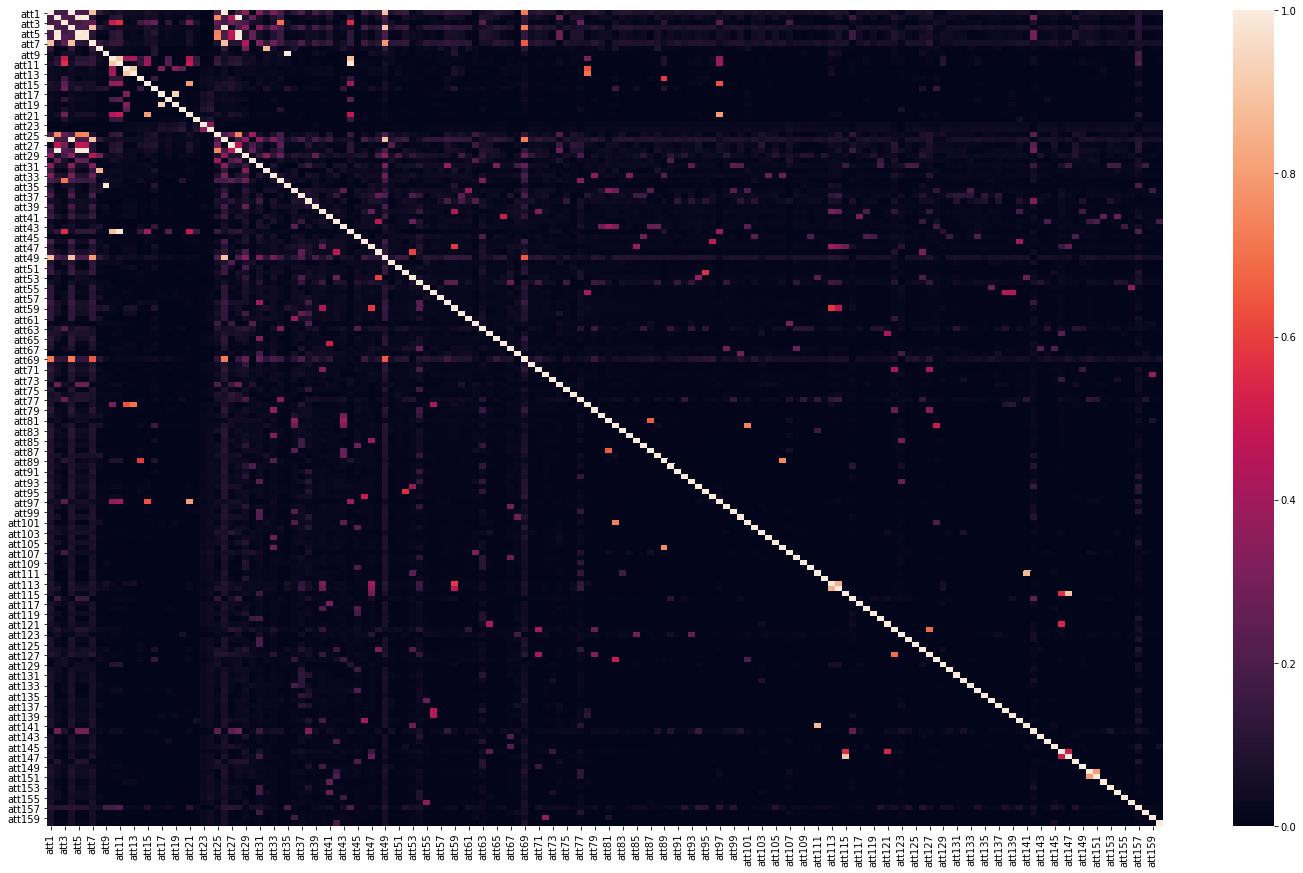

In [23]:
#Plotting the heatmap of correlation matrix.
import seaborn as sb
fig = plt.figure(figsize = (25,15))

sb.heatmap(C_mat)
plt.show()

In [140]:
import seaborn as sb
fig = plt.figure(figsize = (25,15))

#sb.heatmap(C_mat_chi)
#plt.show()

<Figure size 1800x1080 with 0 Axes>

In [25]:
# Finding the columns with high correlation to drop.
upper = C_mat.where(np.triu(np.ones(C_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("columns to drop due to dependence to other attribute:", to_drop)

columns to drop due to dependence to other attribute: ['att4', 'att5', 'att6', 'att26', 'att28', 'att35', 'att44']


# Feature importance to target
## Checking which attributes are important to conversion rate y

In [53]:
from sklearn import linear_model
reg = linear_model.LassoCV(cv =5)
reg.fit(d_att, y)
#print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
#print("Best score using built-in LassoCV: %f" %reg.score(d_att,yy))
coef = pd.Series(reg.coef_, index = d_att.columns)

In [54]:
imp_coef = coef.abs().sort_values(ascending = False)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print("The variables are:", imp_coef[imp_coef>0].index)

Lasso picked 45 variables and eliminated the other 115 variables
The variables are: Index(['att34', 'att76', 'att28', 'att44', 'att9', 'att3', 'att62', 'att8',
       'att11', 'att31', 'att95', 'att27', 'att59', 'att33', 'att80', 'att49',
       'att43', 'att29', 'att1', 'att30', 'att128', 'att53', 'att82', 'att157',
       'att25', 'att12', 'att108', 'att67', 'att142', 'att81', 'att36',
       'att39', 'att54', 'att63', 'att89', 'att38', 'att145', 'att46', 'att69',
       'att123', 'att122', 'att37', 'att7', 'att4', 'att35'],
      dtype='object')


In [59]:

print("Feature importance by coefficients of features in Lasso:")
print(imp_coef[imp_coef>0])

Feature importance by coefficients of features in Lasso:
att34     2.215490e-02
att76     1.827120e-02
att28     1.789220e-02
att44     1.730240e-02
att9      1.563000e-02
att3      1.364540e-02
att62     1.204240e-02
att8      1.135110e-02
att11     9.870300e-03
att31     9.843700e-03
att95     9.365200e-03
att27     8.854800e-03
att59     7.360400e-03
att33     7.038200e-03
att80     7.037800e-03
att49     5.823200e-03
att43     5.613700e-03
att29     5.120700e-03
att1      5.015200e-03
att30     4.698500e-03
att128    4.193400e-03
att53     4.146100e-03
att82     4.075400e-03
att157    3.445500e-03
att25     3.028700e-03
att12     2.647500e-03
att108    2.454500e-03
att67     2.396600e-03
att142    2.340500e-03
att81     2.044600e-03
att36     2.029800e-03
att39     1.899800e-03
att54     1.474900e-03
att63     1.265000e-03
att89     1.207500e-03
att38     8.946000e-04
att145    4.709000e-04
att46     4.037000e-04
att69     3.471000e-04
att123    2.709000e-04
att122    2.164000e-04


Text(0.5, 1.0, 'Feature importance using Lasso Model')

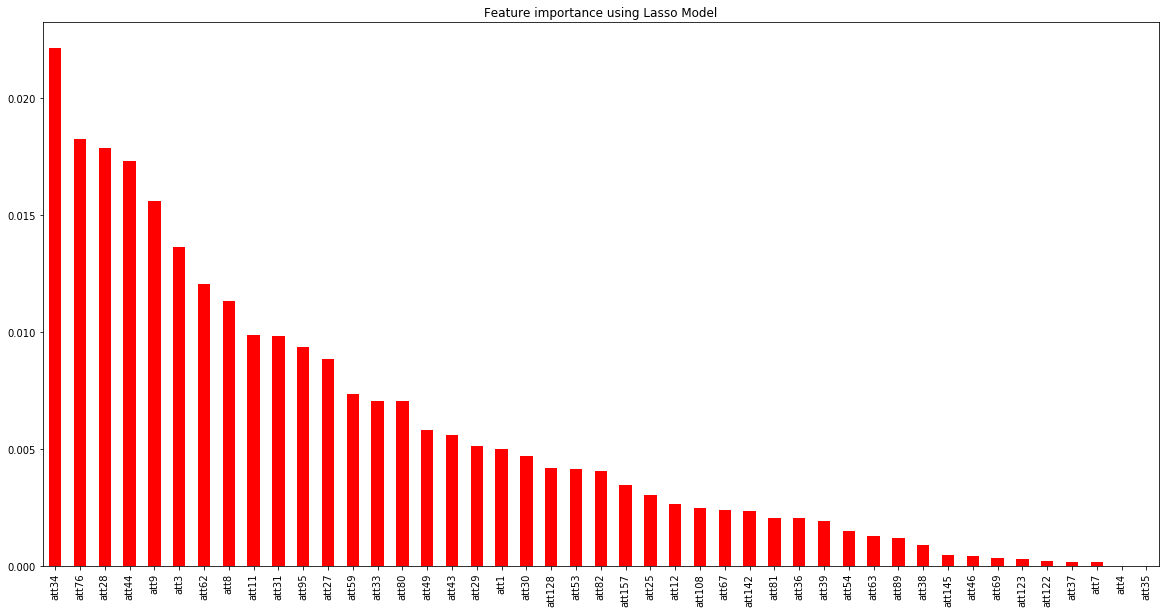

In [60]:
#Plotting feature importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
imp_coef[imp_coef>0].plot(kind = "bar", color="r", align="center")
plt.title("Feature importance using Lasso Model")

In [64]:
imp_attr = list(imp_coef[imp_coef>0].index)

# Feature importance by mutual_info_regression

In [147]:
from sklearn.feature_selection import SelectPercentile, f_classif,mutual_info_classif, mutual_info_regression
X_indices = np.arange(d_att.shape[-1])
selector = SelectPercentile(mutual_info_regression, percentile=50)
selector.fit(d_att, y)
scores = selector.scores_
scores /= scores.max()

In [170]:
v= pd.DataFrame({'attr': d_att.columns,'score': scores})

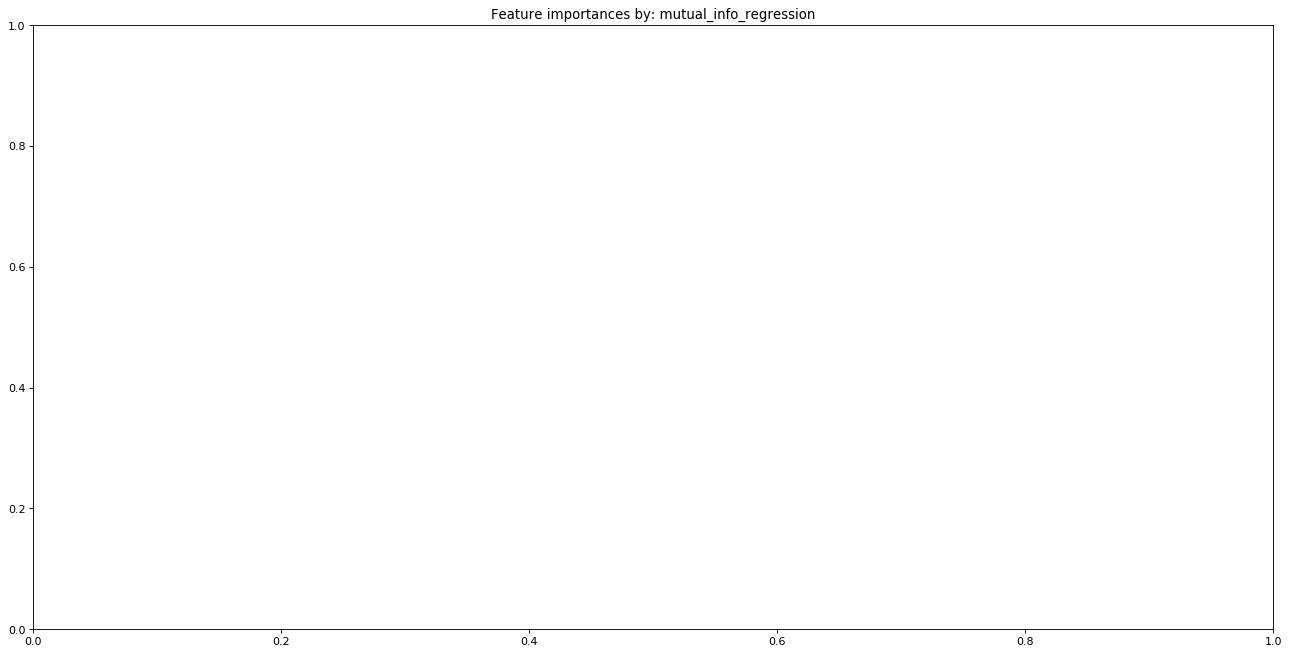

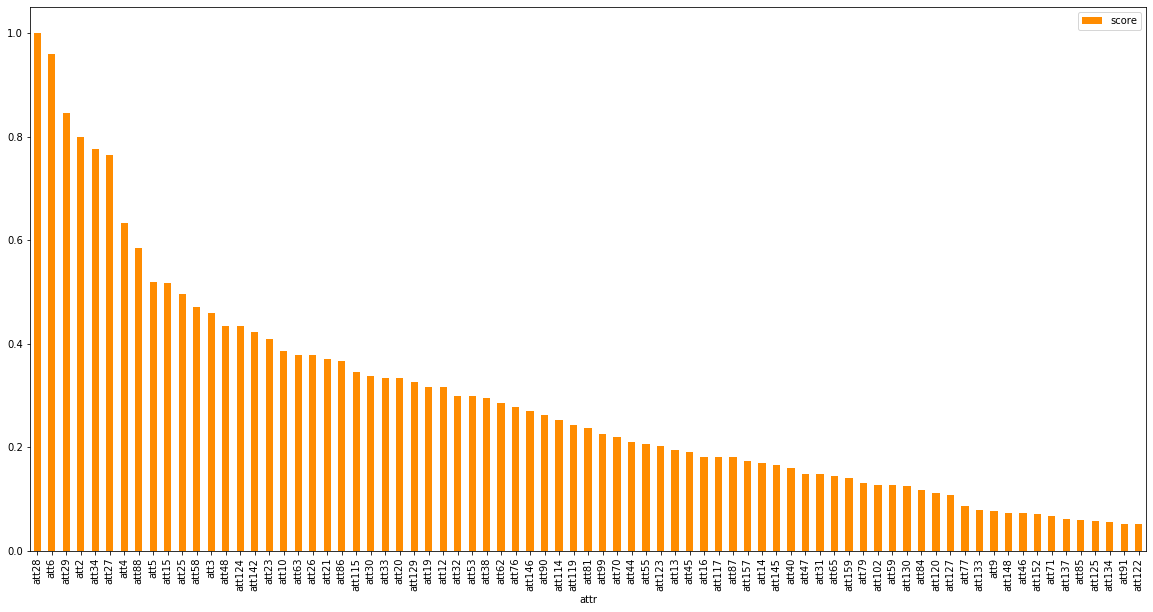

In [205]:
plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances by: "+"mutual_info_regression")
v[v.score>0.05].set_index('attr').sort_values('score', ascending = False).plot(kind = "bar", color="darkorange", align="center")
plt.show()

# Final list of selected features

In [206]:
imp_attr1 = list(v[v.score> 0.05].attr)

In [211]:
selected_attr = list(set(imp_attr1+imp_attr)- set(to_drop))
print("number of selected attributes:",len(selected_attr))

number of selected features: 89


# Preparing training and test data with selected features

In [236]:
X = d_train[selected_attr + ['entity_id','device']]
y=d_train.Conversions/d_train.Clicks

In [213]:
def make_onehot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for col in cols:
        s = set(df[col].tolist())
        l = len(s)
        f = dict(zip(s, np.eye(l)[range(l)]))
        p = dict(zip(range(l),s))
        g = lambda x: f[x]
        a = df[col].apply(g)
        b= pd.DataFrame.from_items(zip(a.index, a.values)).T
        for j in range(0,l):
           # name = col + '/%d'% j
            name = col + "/"+ str(p[j])
            df[name] = b.iloc[:,j]
    return df.drop(cols, axis=1)

In [214]:
device = X['device'].unique()
device_dict = {}
for i,device in enumerate(device):
    device_dict[device] = i
device_dict

{'Computer': 0, 'Smartphone': 1, 'Tablet': 2}

In [215]:
#X['device'] = X.loc[:,'device'].map(device_dict)

In [239]:
X= make_onehot(X, ['device'])

/Users/debasissen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  
/Users/debasissen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [217]:
X.head()

,att70,att88,att23,att3,att15,att13,att46,att152,att81,att19,att21,att127,att29,att157,att114,att122,att49,att1,att120,att53,att59,att32,att37,att67,att9,att14,att33,att123,att82,att95,att125,att10,att76,att79,att7,att54,att38,att20,att39,att146,att119,att134,att62,att71,att63,att102,att129,att84,att86,att36,att159,att91,att85,att27,att34,att89,att55,att77,att40,att80,att16,att48,att30,att47,att145,att25,att124,att148,att2,att128,att69,att108,att31,att87,att12,att90,att58,att130,att45,att137,att99,att43,att115,att117,att11,att133,att142,att8,att65,entity_id,device/Smartphone,device/Computer,device/Tablet
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13230,0.0,1.0,0.0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4673,0.0,1.0,0.0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13348,0.0,1.0,0.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1277,0.0,1.0,0.0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9565,0.0,1.0,0.0


# Building regression models

In [218]:
#
from sklearn.model_selection import cross_validate
from sklearn.linear_model import BayesianRidge, LinearRegression, SGDRegressor, ElasticNet, LassoCV, Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR


In [219]:
## Different regression models
ols = LinearRegression()   # Linear regression 
reg = linear_model.Ridge(alpha=.01, normalize=False,fit_intercept=True) # Ridge regression 
clf = BayesianRidge(compute_score=True)  # Bayesian Ridge 
las = LassoCV(cv=10, random_state=0)    # Lasso regression
elas = ElasticNet(.001,l1_ratio=0.9)
svmr = SVR(C=2.0, epsilon=0.2, gamma = 'auto')   # Support vector regressor
gbr = GradientBoostingRegressor(loss ='huber', max_depth=6,learning_rate=.1,n_estimators=400)   # Gradient Booasting
rnf = RandomForestRegressor(random_state=0,n_estimators=100)
adab = AdaBoostRegressor()


In [220]:
## Training with Cross validation 
from sklearn.model_selection import KFold
cv = KFold(shuffle=True, random_state=None, n_splits =5) # cross validation with 5 splits
cv_results = {}
clas  = [ols, reg,clf, las,elas, svmr, gbr,rnf, adab]
for model in clas:
    cv_results[model] = cross_validate(model, X, y, cv=cv,return_train_score = True, return_estimator = True, scoring=('neg_mean_squared_error'))
    print(cv_results[model])

"""
Error metrics for regressions:

‘explained_variance’	metrics.explained_variance_score	 
‘max_error’	metrics.max_error	 
‘neg_mean_absolute_error’	metrics.mean_absolute_error	 
‘neg_mean_squared_error’	metrics.mean_squared_error	 
‘neg_mean_squared_log_error’	metrics.mean_squared_log_error	 
‘neg_median_absolute_error’	metrics.median_absolute_error	 
‘r2’	metrics.r2_score
"""

In [221]:
cv_results

{LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False): {'fit_time': array([0.19893885, 0.12804413, 0.13526487, 0.22708106, 0.13824606]),
  'score_time': array([0.00873518, 0.00812578, 0.00779915, 0.0131011 , 0.00787687]),
  'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
  'test_score': array([0.02242103, 0.02200431, 0.01869723, 0.02498837, 0.01545023]),
  'train_score': array([0.0247288 , 0.02499874, 0.02590215, 0.02421372, 0.02670742])},
 Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001): {'fit_ti

In [259]:
## Choosing model with max cross validation accuracy. This can be automated.
mod1 = cv_results[elas]['estimator'][4]
mod2 = cv_results[reg]['estimator'][3]
mod3 = cv_results[rnf]['estimator'][4]



# Neural network model

In [3]:
from keras.callbacks import ModelCheckpoint
import time
import keras
from keras.layers import* 

Using TensorFlow backend.


In [4]:
#input_len = X.shape[1]
input_len =89

In [5]:
input_len

89

In [6]:

# input to the model
feat_input = Input(shape=[input_len], name='features')

# Adding noise to make the model robust
feat_noise = noise.GaussianNoise(stddev = .1, name='features_noise')(feat_input)

# dropout to control overfitting
feat_dropout = Dropout(0.2)(feat_noise)

#Dense Layer 1
feat_dropout_norm = BatchNormalization(name='Batch1')(feat_dropout)
dense_1 =Dense(128, activation='relu')(feat_dropout_norm)

#Dense Layer 2
dense_batch = BatchNormalization(name='Batch2')(dense_1)
dropout_1 = Dropout(0.2)(dense_batch)
dense_2 =Dense(64, activation='relu')(dropout_1)

#Output layer
dense_batch_2 = BatchNormalization(name='Batch3')(dense_2)
dropout_2 = Dropout(0.5)(dense_batch_2)
y = Dense(1, activation='sigmoid',name='output')(dropout_2)


model = keras.Model(inputs=[feat_input], outputs=y)

optimizer = 'sgd' 
loss = 'mean_squared_error' 
metrics = ['accuracy','binary_accuracy','mean_squared_error','categorical_accuracy']

model.compile(optimizer = optimizer, loss = loss, metrics = metrics)  
"""
 other optimizer options: 'adam','sgd', 'adagrad', 'Adadelta', 'RMSprop'
 
 other loss function options: mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
 mean_squared_logarithmic_error,cosine_proximity, binary_crossentropy, logcosh, squared_hinge, hinge
 
 keras activation functions: softmax, elu, selu, softplus, softsign, relu, tanh, sigmoid, hard_sigmoid
"""


"\n other optimizer options: 'adam','sgd', 'adagrad', 'Adadelta', 'RMSprop'\n \n other loss function options: mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,\n mean_squared_logarithmic_error,cosine_proximity, binary_crossentropy, logcosh, squared_hinge, hinge\n \n keras activation functions: softmax, elu, selu, softplus, softsign, relu, tanh, sigmoid, hard_sigmoid\n"

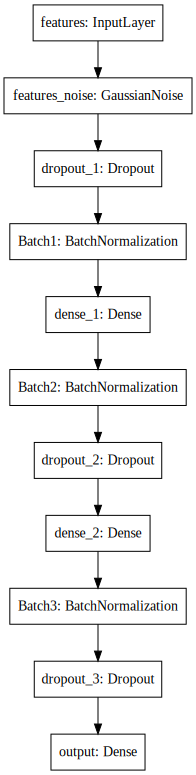

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydotplus

SVG(model_to_dot(model).create(prog='dot', format='svg'))
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='sellics_model_plot.png',show_shapes=False, show_layer_names=True)
    


In [243]:
y=d_train.Conversions/d_train.Clicks

In [244]:
t1= time.time()
path = os.getcwd()
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'nn_reg'
path_name = path + '/' + modname + '.h5'
mcheck = ModelCheckpoint(path_name, monitor='val_loss', save_best_only = True, verbose=0)

his= model.fit(X.values,y.values,
                  epochs= 10,
                 validation_split=0.1,
                # callbacks=[mcheck],
                 shuffle=True
                 #verbose=1
               )
print("Model trained in seconds {:.2f}".format( time.time()-t1 ))

Train on 40225 samples, validate on 4470 samples
Epoch 1/10
40225/40225 [==============================] - 25s 614us/step - loss: 0.1271 - acc: 0.6928 - binary_accuracy: 0.6928 - mean_squared_error: 0.1271 - categorical_accuracy: 1.0000 - val_loss: 0.0290 - val_acc: 0.8843 - val_binary_accuracy: 0.8843 - val_mean_squared_error: 0.0290 - val_categorical_accuracy: 1.0000
Epoch 2/10
40225/40225 [==============================] - 18s 451us/step - loss: 0.0402 - acc: 0.8160 - binary_accuracy: 0.8160 - mean_squared_error: 0.0402 - categorical_accuracy: 1.0000 - val_loss: 0.0251 - val_acc: 0.8843 - val_binary_accuracy: 0.8843 - val_mean_squared_error: 0.0251 - val_categorical_accuracy: 1.0000
Epoch 3/10
40225/40225 [==============================] - 18s 445us/step - loss: 0.0310 - acc: 0.8257 - binary_accuracy: 0.8257 - mean_squared_error: 0.0310 - categorical_accuracy: 1.0000 - val_loss: 0.0243 - val_acc: 0.8843 - val_binary_accuracy: 0.8843 - val_mean_squared_error: 0.0243 - val_categorical

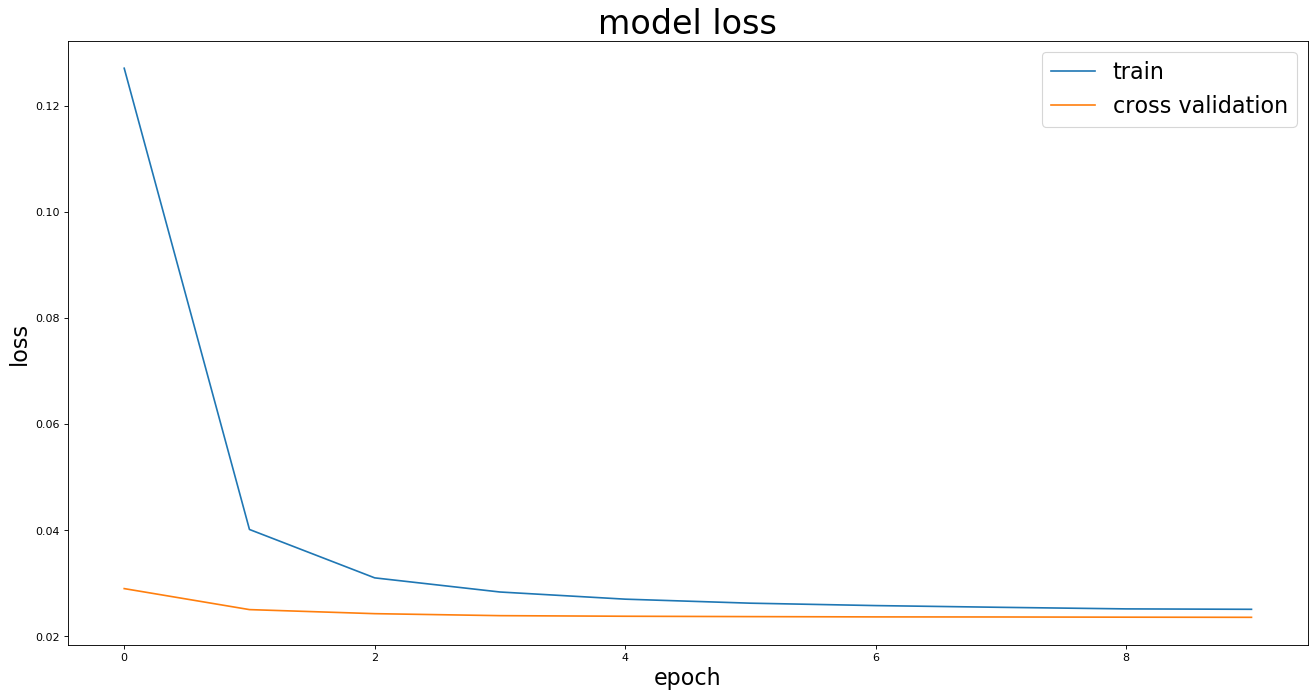

In [245]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss',fontsize=30)
plt.ylabel('loss',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'cross validation'], loc='upper right',fontsize=20)
plt.show()

# Prediction on test set

In [254]:
X_test = d_test[selected_attr + ['entity_id','device']]
X_test= make_onehot(X_test, ['device'])

/Users/debasissen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  
/Users/debasissen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [301]:
pred_avg =(model.predict(X_test.values).T+mod1.predict(X_test)+ mod2.predict(X_test)+ mod3.predict(X_test))/4

In [312]:
d_pred = d_test[['entity_id','device']]

In [310]:
d_pred['pred'] = pred_avg.T

/Users/debasissen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [311]:
d_pred

,entity_id,device,pred
0,48,Computer,0.074902
1,54,Computer,0.032771
2,54,Smartphone,0.017121
3,55,Smartphone,0.016550
4,70,Smartphone,0.047810
5,71,Computer,0.128977
6,73,Computer,0.037461
7,73,Tablet,0.034912
8,95,Computer,0.049625
9,97,Smartphone,0.020264
